In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.multiclass import OneVsRestClassifier
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
import numpy as np

%matplotlib inline

In [21]:
df1 = pd.read_csv("Data/data1.csv")
df2 = pd.read_csv("Data/data2.csv")
df3 = pd.read_csv("Data/data3.csv")
df3 = df3.drop(columns='Track Name')
df12 = pd.merge(df1, df2, on = 'id')
df = pd.merge(df12, df3, on = 'id')
df

,id,Artist Name,Track Name,Popularity,duration,Class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,key,mode,time_signature
0,0,BrMa,track_1,60.0,234.596,6,0.854745,0.563472,0.873150,0.027152,0.017169,NaN,0.070304,0.911981,0.558039,1.0,major,type 4
1,1,De,track_1,66.0,173.968,6,0.853669,0.596512,0.834119,0.034664,0.021285,NaN,0.107996,0.570260,0.412278,10.0,minor,type 4
2,2,DuAh,track_1,14.0,164.093,10,0.706262,0.884861,0.888523,0.010839,0.061647,NaN,0.241085,0.843637,0.525542,1.0,minor,type 4
3,3,EyGo,track_1,34.0,206.875,10,0.565311,0.380250,0.806818,0.024791,0.436747,NaN,0.112059,0.314487,0.610897,1.0,minor,type 4
4,4,HaLaBrdeLo,track_1,34.0,266.415,8,0.432968,0.373242,0.695840,0.010625,0.952811,0.932731,0.117139,0.161230,0.498027,11.0,minor,type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6048,6048,Mod,track_4,40.0,185.016,9,0.422208,0.994994,0.898256,0.055806,0.000103,0.360441,0.191303,0.226468,0.374596,1.0,major,type 4
6049,6049,LiDukl,track_3,55.0,178.605,6,0.349042,0.819782,0.899004,0.190813,0.398594,NaN,0.099868,0.437714,0.324293,5.0,minor,type 4
6050,6050,gnk,track_1,20.0,244.053,10,0.578223,0.632555,0.793317,0.079309,0.010141,0.211847,0.625114,0.725588,0.589835,9.0,minor,type 4
6051,6051,SmHiCo,track_1,34.0,216.222,9,0.536260,0.980977,0.880163,0.051513,0.000030,0.000136,0.660673,0.252356,0.401319,4.0,minor,type 4


In [22]:
DF_PROB1 = pd.read_csv('./Data/data1_test.csv') 
DF_PROB2 = pd.read_csv('./Data/data2_test.csv')
DF_PROB3 = pd.read_csv('./Data/data3_test.csv')

DF_PROB12 = pd.merge(DF_PROB1, DF_PROB2, on='id')
DF_PROB = pd.merge(DF_PROB12, DF_PROB3, on='id')



In [23]:
df_train = df.sample(frac = 0.8, random_state=0)
df_test = df.drop(df_train.index)

In [24]:
df_test

,id,Artist Name,Track Name,Popularity,duration,Class,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,key,mode,time_signature
0,0,BrMa,track_1,60.0,234.596,6,0.854745,0.563472,0.873150,0.027152,0.017169,NaN,0.070304,0.911981,0.558039,1.0,major,type 4
7,7,Da,track_1,70.0,157.693,6,0.852593,0.729673,0.852212,0.037240,0.021988,NaN,0.325409,0.389044,0.333964,1.0,major,type 4
21,21,ViMa,track_1,47.0,180.895,8,0.467398,0.062265,0.517806,0.022322,0.987952,0.929719,0.095804,0.136378,0.256987,2.0,major,type 4
24,24,BE,track_1,53.0,180.533,10,0.496449,0.531433,0.710239,0.013415,0.565261,0.000436,0.376206,0.318629,0.348433,9.0,minor,type 4
25,25,VaJa,track_1,20.0,214.733,4,0.337207,0.706645,0.758304,0.035415,0.670683,0.000036,0.350808,0.757689,0.315602,1.0,minor,type 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6035,WoKin,track_1,23.0,209.887,9,0.342587,0.987985,0.896234,0.044859,0.000415,0.000979,0.637306,0.201615,0.333765,7.0,major,type 4
6036,6036,KiKurshore,track_14,37.0,303.400,4,0.531956,0.396269,0.715206,0.010088,0.650602,NaN,0.092756,0.390080,0.438042,9.0,minor,type 4
6041,6041,Tua,track_16,34.0,258.743,6,0.740693,0.581494,0.841756,0.038957,0.087249,NaN,0.811033,0.187118,0.444516,5.0,minor,type 4
6043,6043,YaShAbJoAmTr,track_1,56.0,221.161,4,NaN,0.533435,0.796861,0.001610,0.354418,0.000115,0.096820,0.263747,0.341517,9.0,minor,type 4


In [25]:
def imputation(x, feature):
    if(pd.isna(x)):
        return df[feature].mean()
    else:
        return x

In [26]:
for features in ['feature_1', 'feature_2','feature_3', 'feature_4','feature_5','feature_7','feature_8','feature_9', 'Popularity']:
    df_train[features] = df_train[features].apply(lambda x: imputation(x, feature=features))
df_train['Popularity'] = df_train['Popularity'].apply(lambda x: x/100)
df_train['Class'].apply(lambda x: str(x))

4985     9
472      9
5781     9
4641     9
1142    10
        ..
2020    10
5396     8
367      4
3436     6
4256    10
Name: Class, Length: 4842, dtype: object

In [27]:
def clamp_dur(x):
    if (x>443.1293056446612):
        return 1
    else:
        return x/443.1293056446612
#Clamp transformation
df_train['duration'] =df_train['duration'].apply(lambda x: clamp_dur(x))

In [28]:
def clamp_feat4(x):
    if (x>0.4525261206445081):
        return 1
    else:
        return x/0.4525261206445081
#Clamp transformation
df_train['feature_4'] =df_train['feature_4'].apply(lambda x: clamp_feat4(x))

In [29]:
X_train_con = df_train[['feature_1','feature_2','feature_3', 'feature_4','feature_5','feature_8','feature_9','Popularity', 'duration']]

In [30]:
model_con = OneVsRestClassifier(
    estimator= LogisticRegression(class_weight='balanced', solver='newton-cg', max_iter=1000, C=210),
)

In [31]:
X_poly = preprocessing.PolynomialFeatures(degree=4, include_bias=False).fit_transform(X=X_train_con)

In [32]:
model_con.fit(X_poly, df_train[['Class']].values)

OneVsRestClassifier(estimator=LogisticRegression(C=210, class_weight='balanced',
                                                 max_iter=1000,
                                                 solver='newton-cg'))

The Naive Bayes Model

In [33]:
X_cat2 = df_train[['key', 'Class']].dropna(inplace=False)
X_train_cat2 = X_cat2[['key']].values
y_train_cat2 = X_cat2[['Class']].values
enc2 = OrdinalEncoder().fit(df_train[['key']].values)
enc_X_train_cat2 = enc2.transform(X_train_cat2)
model_cat2 = CategoricalNB()
model_cat2.fit(enc_X_train_cat2, y_train_cat2)

C:\Users\DARRYL CHANDRA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [34]:
enc2.transform(df_train[0:10][['key']].values).shape

(10, 1)

In [35]:
def predict(X):
    # Preprocess
    classes = [ 4,  6,  8,  9, 10]
    # cat1 = enc1.transform(X[['mode', 'time_signature']])
    for features in ['feature_1','feature_2', 'feature_3', 'feature_4','feature_5','feature_8', 'feature_9','Popularity', 'duration']:
        X[features] = X[features].apply(lambda x: imputation(x, feature=features))
    X['Popularity'] = X['Popularity'].apply(lambda x: x/100)
    X['duration'] =X['duration'].apply(lambda x: clamp_dur(x))
    X['feature_4'] = X['feature_4'].apply(lambda x: clamp_feat4(x))
    X_polynom = preprocessing.PolynomialFeatures(degree=4, include_bias=False).fit_transform(X=X[['feature_1','feature_2','feature_3', 'feature_4','feature_5','feature_8','feature_9','Popularity', 'duration']])
    print(X.max())
    # proba_con = model_con.predict_proba(X_polynom)
    # proba_cat1 = model_cat1.predict_proba(cat1)
    # prob_combine = proba_con*proba_cat1
    # final_yhat = []
    # for i in range(len(X)):
    #     y_proba = [0,0,0,0,0]
    #     max_index = 0
    #     for j in range(1, 5):
    #         if(prob_combine[i][max_index] < prob_combine[i][j]):
    #             max_index = j
    #     final_yhat.append(classes[max_index])


    return model_con.predict(X_polynom)



In [36]:
yhat = predict(df_test)

id                    6050
Artist Name            ◊ûê
Track Name         track_9
Popularity             1.0
duration               1.0
Class                   10
feature_1         0.974177
feature_2              1.0
feature_3         0.999551
feature_4              1.0
feature_5              1.0
feature_6         0.990964
feature_7         0.987809
feature_8         0.983432
feature_9         0.978415
key                   11.0
mode                 minor
time_signature      type 5
dtype: object


In [37]:
yhat

array([10, 10,  8, ..., 10,  4,  6], dtype=int64)

In [38]:
f1_score(y_pred=yhat, y_true=df_test[['Class']].values, average='micro')

0.8109000825763831

<Axes: xlabel='Class'>

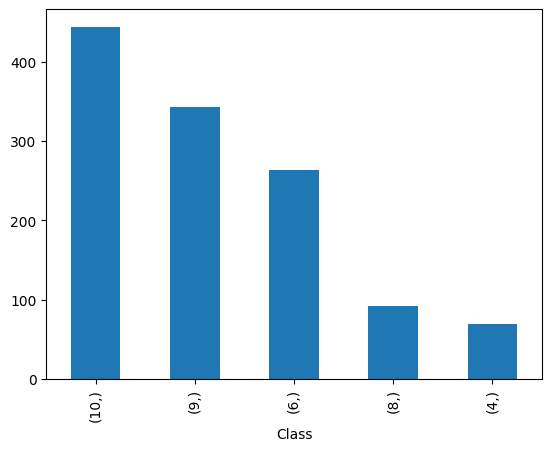

In [39]:
pd.DataFrame({'Class':yhat}).value_counts().plot(kind='bar')

In [40]:
list_class = predict(DF_PROB)
df_to_submit = pd.DataFrame({'id' : DF_PROB['id'] })


id                     749
Artist Name             ◊û
Track Name_x       track_9
Popularity            0.94
duration               1.0
feature_1         0.990316
feature_2         0.997998
feature_3         0.971426
feature_4              1.0
feature_5         0.997992
feature_6         0.976908
feature_7         0.981713
feature_8         0.988609
feature_9         0.999822
Track Name_y       track_9
key                   11.0
mode                 minor
time_signature      type 5
dtype: object


In [41]:
df_to_submit['Class'] = list_class

In [42]:
df_to_submit[['id', 'Class']]

,id,Class
0,0,10
1,1,10
2,2,9
3,3,10
4,4,10
...,...,...
745,745,8
746,746,10
747,747,9
748,748,8


<Axes: xlabel='Class'>

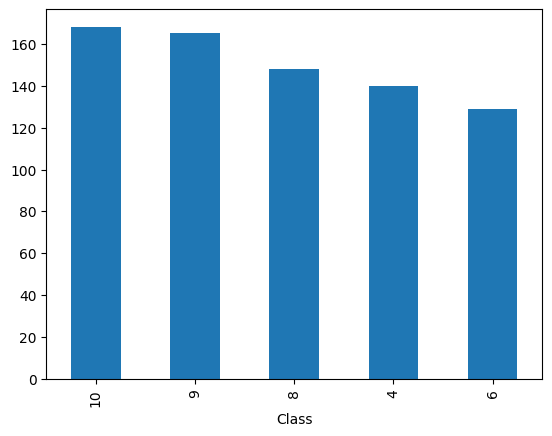

In [43]:
df_to_submit['Class'].value_counts().plot(kind='bar')

In [44]:
df_to_submit.to_csv('to_submit3.csv', index =False)

<Axes: xlabel='Class'>

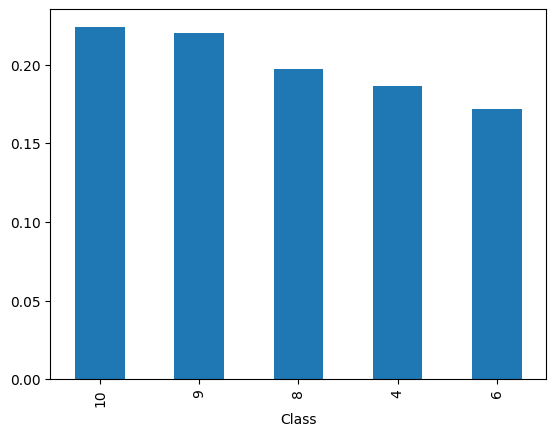

In [45]:
(pd.read_csv('to_submit3.csv')['Class'].value_counts(len(pd.read_csv('to_submit2.csv')))).plot(kind='bar')